First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Decision Tree Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.

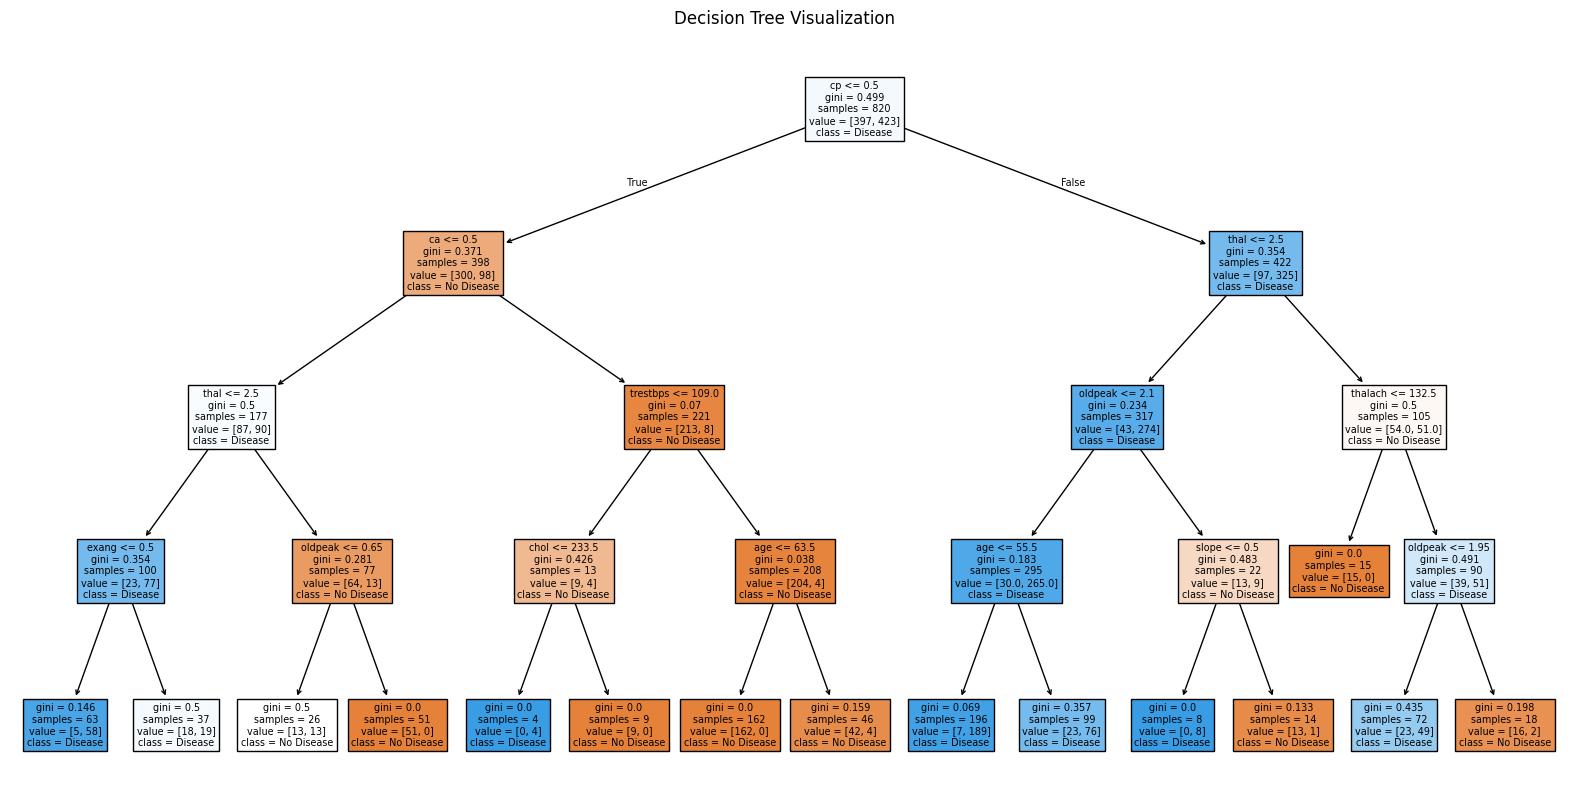


Decision Tree Cross-Validation Accuracy: 0.8341463414634147

Random Forest Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



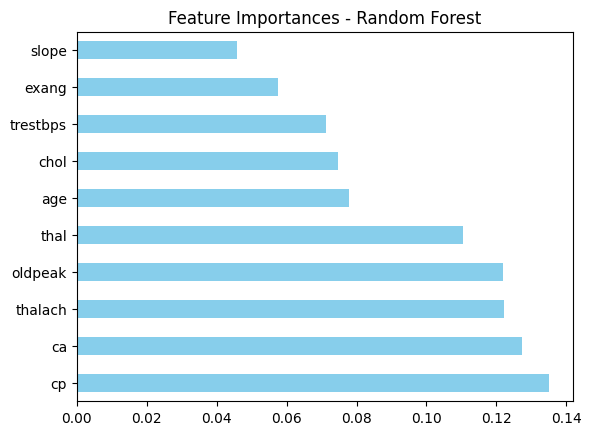

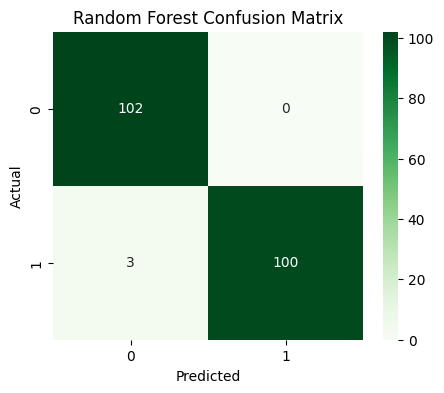

In [1]:
# Task 5 - Decision Tree and Random Forest Classifier
# Author: Manoj Kumar

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
# Dataset link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
df = pd.read_csv("heart.csv")  # rename the file to heart.csv after downloading

# Step 2: Explore dataset
print("First 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# Step 3: Split dataset into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Step 4: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)

# Step 6: Evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Step 7: Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Step 8: Check Overfitting via Cross-Validation
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
print("\nDecision Tree Cross-Validation Accuracy:", cv_scores_dt.mean())

# Step 9: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 10: Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 11: Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Feature Importances - Random Forest")
plt.show()

# Step 12: Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
